In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping 

In [95]:
import sklearn.linear_model

In [96]:
import sklearn.metrics

In [97]:
#pip install tensorflow


In [98]:
pwd

'C:\\Users\\Daniel\\OneDrive\\Documents\\MScData\\Semester2\\CA2\\CA2_bigData'

In [99]:
df =pd.read_csv('TwitterDataSentiments.csv')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_11612\2797416005.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('TwitterDataSentiments.csv')


In [100]:
df

,Unnamed: 0,Date,Text,sentiments
0,0,06/04/2009 22:19,switchfoot httptwitpiccomyzl a s bummer you sh...,Netural
1,1,06/04/2009 22:19,upset cant update facebook texting it might cr...,Netural
2,2,06/04/2009 22:19,kenichan i dived many times ball managed save ...,Positive
3,3,06/04/2009 22:19,whole body feels itchy like fire,Positive
4,4,06/04/2009 22:19,nationwideclass no not behaving all im mad her...,Negative
...,...,...,...,...
2097145,2097145,NaN,opened mouth insert foot chewed really hard ho...,Negative
2097146,2097146,NaN,trying move head potteringabout mode backtowor...,Netural
2097147,2097147,NaN,sick twice already im still going school feel ...,Negative
2097148,2097148,NaN,kherrylobrien boo ill blue side gotta keep mag...,Netural


In [101]:
df = df.drop(['Unnamed: 0', ],axis=1)
df.dropna(inplace=True) 

In [102]:
df = df[['Date','Text', 'sentiments']]
df.head() 


,Date,Text,sentiments
0,06/04/2009 22:19,switchfoot httptwitpiccomyzl a s bummer you sh...,Netural
1,06/04/2009 22:19,upset cant update facebook texting it might cr...,Netural
2,06/04/2009 22:19,kenichan i dived many times ball managed save ...,Positive
3,06/04/2009 22:19,whole body feels itchy like fire,Positive
4,06/04/2009 22:19,nationwideclass no not behaving all im mad her...,Negative


In [85]:
df1 = df.loc[(df.Text == 'work')]

In [87]:
df1

,Date,Text,sentiments
870,06/04/2009 23:21,work,Netural
1985,07/04/2009 00:42,work,Netural
5863,07/04/2009 05:38,work,Netural
6219,07/04/2009 06:03,work,Netural
7344,07/04/2009 07:24,work,Netural
...,...,...,...
947747,16/05/2009 21:14,work,Netural
966748,17/05/2009 11:18,work,Netural
1007331,22/05/2009 02:09,work,Netural
1030555,26/05/2009 22:35,work,Netural


<Axes: xlabel='sentiments', ylabel='count'>

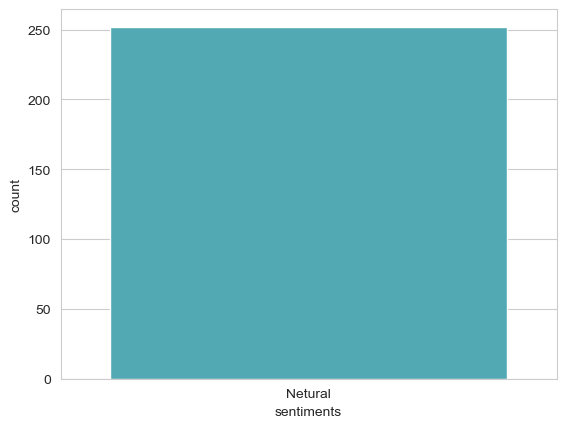

In [86]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='sentiments',data=df1,palette='YlGnBu_r')

In [46]:
one_hot = pd.get_dummies(df["sentiments"])
df.drop(["sentiments"],axis=1, inplace=True)
df = pd.concat([df, one_hot], axis=1)
df.head() 


,Date,Text,Negative,Netural,Positive
0,06/04/2009 22:19,switchfoot httptwitpiccomyzl a s bummer you sh...,0,1,0
1,06/04/2009 22:19,upset cant update facebook texting it might cr...,0,1,0
2,06/04/2009 22:19,kenichan i dived many times ball managed save ...,0,0,1
3,06/04/2009 22:19,whole body feels itchy like fire,0,0,1
4,06/04/2009 22:19,nationwideclass no not behaving all im mad her...,1,0,0


In [103]:
one_hot1 = pd.get_dummies(df["sentiments"])
#df.drop(["sentiments"],axis=1, inplace=True)
dfSetimenets = pd.concat([df, one_hot], axis=1)

In [104]:
dfSetimenets.to_csv('SentimentsSplit.csv')

In [48]:
#sns.set_style('whitegrid')
#'sns.countplot(x='Text',data=df,
#palette='YlGnBu_r') 

In [49]:
df = df.drop(["Date"], axis=1)

In [50]:
#df = df.head(10000)

## take the topic 

In [51]:
df = df.loc[(df.Text == 'work')]

In [74]:
df

,Text,Negative,Netural,Positive
870,work,0,1,0
1985,work,0,1,0
5863,work,0,1,0
6219,work,0,1,0
7344,work,0,1,0
...,...,...,...,...
947747,work,0,1,0
966748,work,0,1,0
1007331,work,0,1,0
1030555,work,0,1,0


In [52]:
X = df["Text"].values
y = df.drop(["Text"], axis=1).values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
#Apply vectorization:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test) 

In [55]:
#Apply frequency, inverse document frequency:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [56]:
#Build a Model with Deep Learning
#Add different layers to models:
model = Sequential()
model.add(Dense(units=12673, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4000, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation="softmax"))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1,
patience=2)

In [57]:
#Fit the model:
model.fit(x=X_train,y=y_train,batch_size=256,epochs=100,validation_data=(X_test, y_test),verbose=1,callbacks=early_stop,
) 

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 1.0883 - accuracy: 0.4773 - val_loss: 0.0494 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.0537 - accuracy: 1.0000 - val_loss: 1.8000e-05 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 936ms/step - loss: 3.5469e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 2.0320e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5: early stopping


In [58]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print("Test accuracy:", model_score[1]) 

2/2 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0


In [60]:
preds = model.predict(X_test)
preds

3/3 [==============================] - 0s 24ms/step


array([[1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.0000000e+00, 9.2225042e-20],
       [1.7538664e-19, 1.000